<hr style="height: 1px;">
<i>This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.</i>
<hr style="height: 1px;">

<h2>Initializing the program</h2>

<font size="3">To initialize the visualization, you may need to click "Run all initialization cells" above (see button location in figure).</font>

<img src="img/binder_initialize_button.png" alt="Drawing" style="width: 700px;" align="left"/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<font size="3">You should see the visualization <i>directly below this line</i>, before the next section.</font>

<br/>
<br/>
<hr style="height: 1px;">

In [13]:
#This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.

%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, FloatRangeSlider, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import cmath
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Define functions
###############################################
###############################################
def omega(w0,gamma):
    result = cmath.sqrt(w0**2. - gamma**2./4.)
    return result

def amplitude(wd,w0,gamma,f0):
    #w -> wd
    result = f0/np.sqrt((w0**2. - wd**2.)**2. + (gamma*wd)**2.)
    return result

def max_response(w0,gamma,f0):
    result = np.sqrt(w0**2. - gamma**2./2.)
    return result

def phase(wd,w0,gamma,f0):
    #w -> wd
    result = np.arctan2(wd*gamma,(w0**2. - wd**2.))
    return result

def theta(t,wd,w0,gamma,f0):
    #w -> wd
    result = amplitude(wd,w0,gamma,f0)*np.cos(wd*t - phase(wd,w0,gamma,f0)) + np.exp(-0.5*gamma*t)*np.cos(np.array(omega(w0,gamma)*t,dtype=np.complex))
    return result

<IPython.core.display.Javascript object>


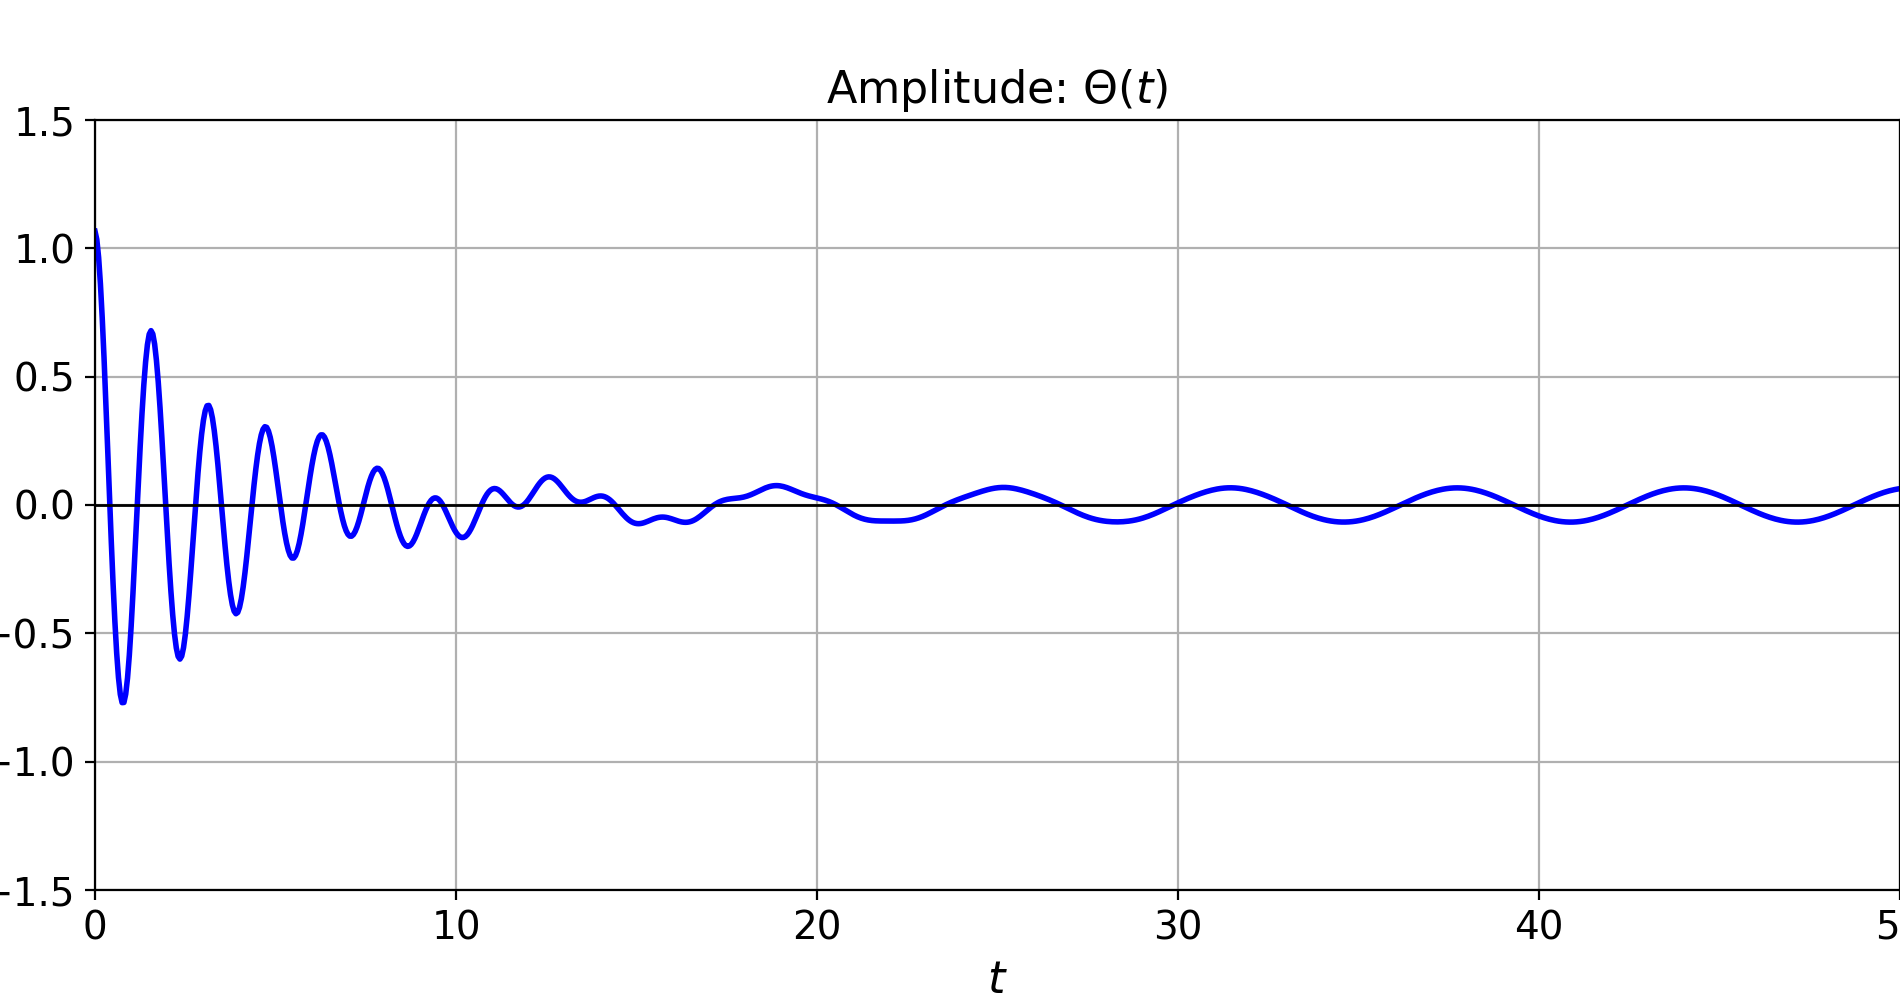

In [15]:
#Define plot
###############################################
###############################################
fig, ax = plt.subplots(1, 1, figsize=(9.5, 5))
plt.subplots_adjust(left=0.05, bottom=None, right=1, top=None, wspace=None, hspace=1.)
t = np.linspace(0., 50., 1000)
wd = 1.
w0 = 4.
gamma = 0.5
f0 = 1.
#############################
#plot1
y_max = 1.5

line_1, = ax.plot(t, theta(t,wd,w0,gamma,f0),
        'b-', lw=2)

ax.plot(t, np.zeros(len(t)),
        'k-', lw=1)

#plot params
ax.set_title('Amplitude: $\Theta (t)$', fontsize=16)
ax.set_xlabel('$t$', fontsize=16)

#x_min, x_max = ax.get_xlim()
#y_min, y_max = ax.get_ylim()

ax.set_xlim(min(t),max(t))
ax.set_ylim(-y_max,y_max)

#x_min, x_max = x_vals
#ax.set_xlim(x_vals)
#ax.set_ylim(y_vals)

ax.grid(True)
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)
    

#Define plot updater
###############################################
###############################################
def update(wd,w0,gamma):
    line_1.set_ydata(theta(t,wd,w0,gamma,f0))    
    fig.canvas.draw_idle()
    return


#Define control elements
###############################################
###############################################
s0=widgets.FloatSlider(
    min=0.1,
    max=10.,
    step=0.1,
    value=1.0,
    layout=Layout(width='500px'),
    description='$\omega_d$',
    style = {'description_width': 'initial'})

s1=widgets.FloatSlider(
    min=0.1,
    max=10.,
    step=0.1,
    value=4.0,
    layout=Layout(width='500px'),
    description='$\omega_0$',
    style = {'description_width': 'initial'})

s2=widgets.FloatSlider(
    min=0,
    max=10,
    step=0.01,
    value=0.5,
    layout=Layout(width='500px'),
    description='$\Gamma$',
    style = {'description_width': 'initial'})


#Connect controls to plot
###############################################
###############################################
out = interactive_output(update, {'wd': s0, 'w0': s1, 'gamma': s2})


#Set layout
###############################################
###############################################
Vbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


#Display output
###############################################
###############################################
display(VBox([s0, s1, s2], layout=Vbox_layout))

<hr style="height: 1px;">

<h2>About the Visualization</h2>

<font size="3"><b>Plot:</b> <i>Amplitude</i> of a damped, driven harmonic oscillator as a function of time.</font>

<br/>
<font size="3"><b>Sliders:</b>
<ul>
    <li>$\omega_{d}$: vary the driving frequency of the system within the range $[0.1,10.0]\,\mathrm{Hz}$</li>
    <li>$\omega_{0}$: vary the natural (resonant) frequency of the system within the range $[0.1,10.0]\,\mathrm{Hz}$</li>
    <li>$\Gamma$: vary the damping of the system within the range $[0.0,10.0]\,\mathrm{Hz}$</li>
</ul>
</font>

<br/>

<hr style="height: 1px;">

<h2>Exploration</h2>

<font size="3">Consider the following questions and possible actions:
<ul>
    <li>How does the amplitude depend on the parameters of the system? Does it have different behaviors at different times?</li>
    <li>Identify transient behavior and steady state behavior.</li>
    <li>What value of $\omega_{d}$ leads to a resonant condition, where the amplitude is maximized?</li>
</ul>      
</font>

<br/>

<hr style="height: 1px;">

<h2>Viewing the Code</h2>
<br/>
<font size="3">You are encouraged to click the button below to view the source code. You can alter the code and rerun it within this notebook, or download the notebook itself and run the code locally on your own machine.</font>

In [16]:
#The code in this block includes content from StackOverFlow User: harshil (CC BY-SA 4.0)
#and can be found here: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
###############################################
###############################################
#Enable hidden code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
